In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics.cluster import contingency_matrix
from scipy.optimize import linear_sum_assignment
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

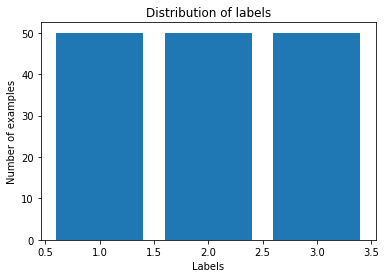

[50, 50, 50]


In [3]:
#Plot the distribution of labels
count_y = []
for i in range(len(set(y))):
    count_y.append(np.count_nonzero(y == (i)))

plt.bar(np.arange(1,len(set(y))+1), count_y)
plt.xlabel('Labels')
plt.ylabel('Number of examples')
plt.title('Distribution of labels')
plt.savefig('./images/label_distribution.png')

plt.show()
print(count_y)

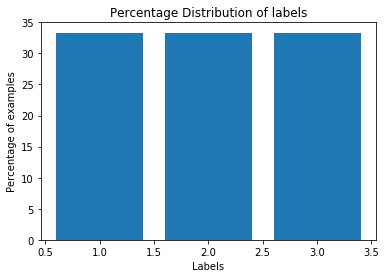

In [4]:
#Plot the distribution of labels
percentage = [count*100/sum(count_y) for count in count_y]

plt.bar(np.arange(1,(len(set(y)))+1), percentage)
plt.xlabel('Labels')
plt.ylabel('Percentage of examples')
plt.title('Percentage Distribution of labels')
plt.savefig('./images/percentage_label_distribution.png')

plt.show()

In [5]:
# Defining Quality Metrics
def quality_metrics(X, y, labels):
    normalized_mutual_info = normalized_mutual_info_score(y, labels)
    adjusted_rand = adjusted_rand_score(y, labels)
    v_measure = v_measure_score(y, labels)
#     silhouette = silhouette_score(X, labels)
    
    contingency_mat = contingency_matrix(y, labels)
    row_ind, col_ind = linear_sum_assignment(-contingency_mat)
    purity = contingency_mat[row_ind, col_ind].sum() / np.sum(contingency_mat)
    
    return purity, normalized_mutual_info, adjusted_rand, v_measure
# , silhouette
    

In [6]:
def quality_plots(x, y, x_label, plot_title):
    df=pd.DataFrame({'x': x, 
                     'Purity': y[:,0], 
                     'Normalized Mutual Information': y[:,1],
                     'Adjusted Rand': y[:,2],
                     'V Measure': y[:,3],
#                      'Silhouette': y[:,4],
                    })
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Set1')
    num=0
    for column in df.drop('x', axis=1):
        num+=1
        plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(plot_title, loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel(x_label)
    plt.ylabel("Scores")
    plt.savefig('./images/'+plot_title,bbox_inches='tight')
    
    return (x[np.argmax(y[:,0])], x[np.argmax(y[:,1])], x[np.argmax(y[:,2])], x[np.argmax(y[:,3])])
#             , x[np.argmax(y[:,4])])


In [7]:
def plot_clusters(new_labels):
    # Plot the identified clusters and compare with the answers
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
    edgecolor='k', s=150)
    axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
    edgecolor='k', s=150)
    axes[0].set_xlabel('Sepal length', fontsize=18)
    axes[0].set_ylabel('Sepal width', fontsize=18)
    axes[1].set_xlabel('Sepal length', fontsize=18)
    axes[1].set_ylabel('Sepal width', fontsize=18)
    axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('Predicted', fontsize=18)

/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI

(3, 3, 3, 3)


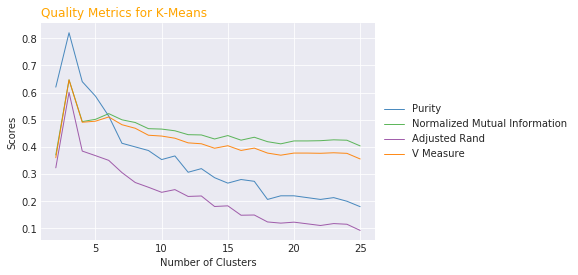

In [8]:
# Understanding the number of clusters and parameters change
overall = []
clusters = np.arange(2,26)
for n in clusters:
    kmeans = KMeans(n_clusters = n, random_state = 0).fit(X)
    labels_kmeans = kmeans.labels_
    kmeans_metrics = quality_metrics(X, y, labels_kmeans)
    overall.append(kmeans_metrics)

maxes = quality_plots(clusters, np.array(overall), "Number of Clusters", "Quality Metrics for K-Means")
print(maxes)

Time:  0.07336831092834473
(0.82, 0.646711490275439, 0.6006861021484542, 0.6467113936056552)


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


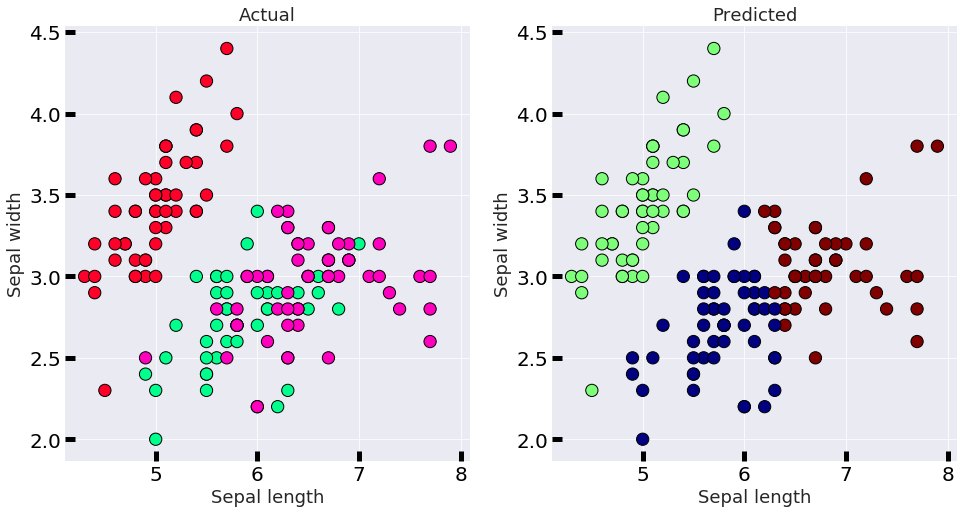

In [9]:
#Implementing clustering algorithms
start = time.time()
kmeans = KMeans(n_clusters = maxes[0], random_state = 0).fit(X)
end = time.time()
print('Time: ', end - start)
labels_kmeans = kmeans.labels_
kmeans_metrics = quality_metrics(X, y, labels_kmeans)
plot_clusters(labels_kmeans)
print(kmeans_metrics)

/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI

(3, 3, 3, 3)


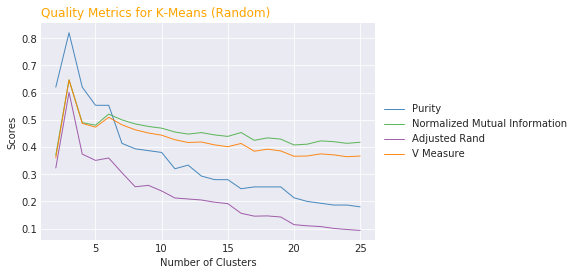

In [10]:
# Understanding the number of clusters and parameters change
overall = []
for n in range(2,26):
    kmeans_random = KMeans(n_clusters = n, init = 'random', random_state = 0).fit(X)
    labels_kmeans_random = kmeans_random.labels_
    kmeans_random_metrics = quality_metrics(X, y, labels_kmeans_random)
    overall.append(kmeans_random_metrics)

maxes = quality_plots(np.arange(2,26), np.array(overall), "Number of Clusters", "Quality Metrics for K-Means (Random)")
print(maxes)

Time:  0.08371782302856445
(0.82, 0.646711490275439, 0.6006861021484542, 0.6467113936056552)


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


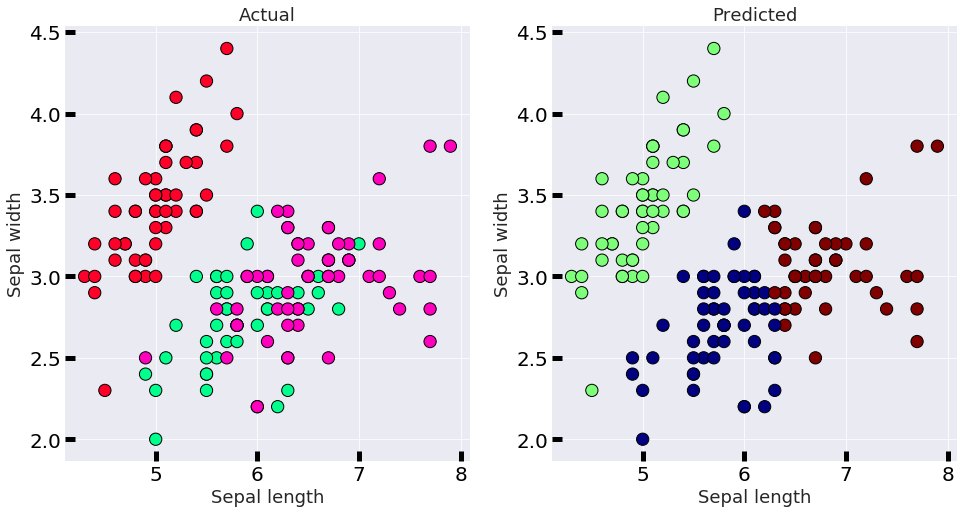

In [11]:
start = time.time()
kmeans_random = KMeans(n_clusters = maxes[0], init = 'random', random_state = 0).fit(X)
end = time.time()
print('Time: ', end - start)
labels_kmeans_random = kmeans_random.labels_
kmeans_random_metrics = quality_metrics(X, y, labels_kmeans_random)
plot_clusters(labels_kmeans_random)
print(kmeans_random_metrics)

0.05 {0, 1, 2, 3, 4, -1}
0.1 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -1}
0.15 {0, 1, 2, 3, 4, 5, 6, -1}
0.2 {0, 1, 2, 3, 4, 5, 6, 7, -1}
0.25 {0, 1, 2, 3, -1}
0.3 {0, 1, 2, -1}
0.35 {0, 1, -1}
0.4 {0, -1}
0.45 {0, -1}
0.5 {0, -1}
0.55 {0}


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI

(0.35, 0.35, 0.35, 0.35)


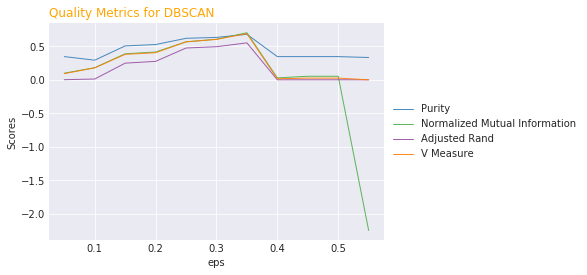

In [12]:
# Understanding the number of clusters and parameters change
overall = []
eps = np.arange(1, 12)
eps = [e/20 for e in eps]
for e in eps:
    dbscan = DBSCAN(eps=e, min_samples=3).fit(X)
    labels_dbscan = dbscan.labels_
    print(e, set(labels_dbscan))
    dbscan_metrics = quality_metrics(X, y, labels_dbscan)
    overall.append(dbscan_metrics)

maxes = quality_plots(eps, np.array(overall), "eps", "Quality Metrics for DBSCAN")
print(maxes)

Time:  0.01093149185180664
(0.68, 0.7031201708357564, 0.5517553852833211, 0.6899788289414183)


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


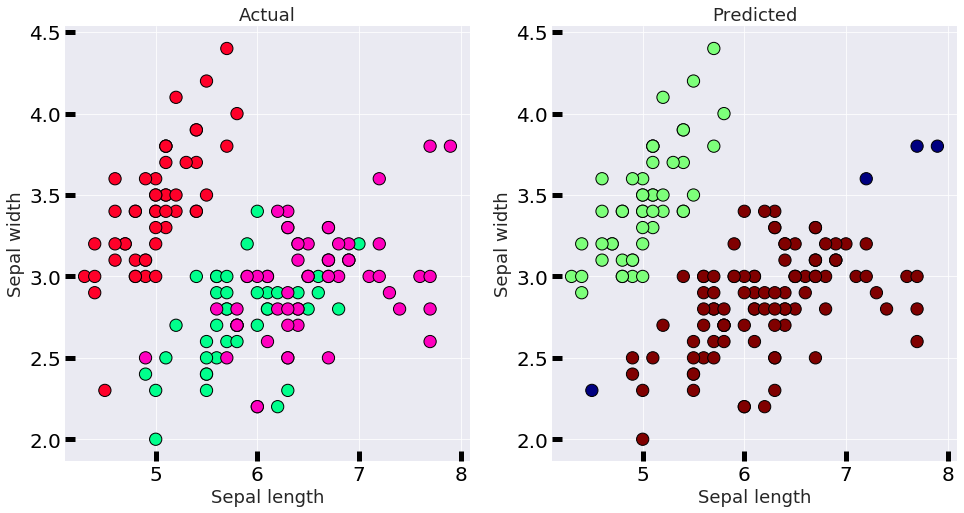

In [13]:
# DBSCAN
start = time.time()
dbscan = DBSCAN(eps = maxes[0], min_samples = 3).fit(X)
end = time.time()
print('Time: ', end - start)
labels_dbscan = dbscan.labels_
dbscan_metrics = quality_metrics(X, y, labels_dbscan)
plot_clusters(labels_dbscan)
print(dbscan_metrics)

0.1 92


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.2 38


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.3 17


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.4 8


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.5 5


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.6 3


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.7 2


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.8 2


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


(0.6, 0.5, 0.5, 0.5)


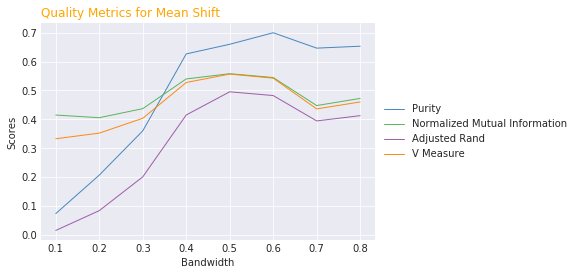

In [14]:
# Understanding the number of clusters and parameters change
overall = []
brange = np.arange(1,9)
brange = [b/10 for b in brange]

for b in brange:
    meanshift = MeanShift(bandwidth = b).fit(X)
    labels_meanshift = meanshift.labels_
    print(b, len(set(labels_meanshift)))
    meanshift_metrics = quality_metrics(X, y, labels_meanshift)
    overall.append(meanshift_metrics)

maxes = quality_plots(brange, np.array(overall), "Bandwidth", "Quality Metrics for Mean Shift")
print(maxes)

Time:  0.7538917064666748


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


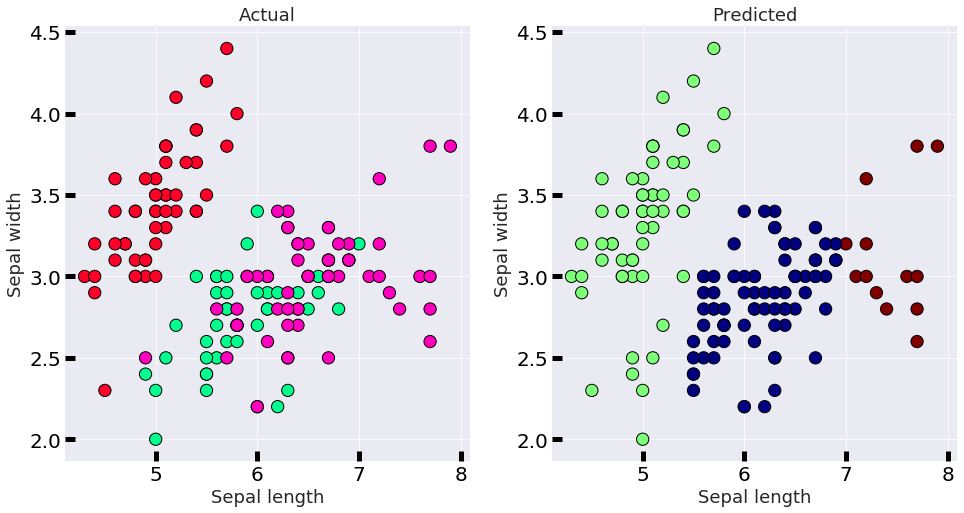

In [15]:
start = time.time()
meanshift = MeanShift(bandwidth = maxes[0]).fit(X)
end = time.time()
print('Time: ', end - start)
labels_meanshift = meanshift.labels_
plot_clusters(labels_meanshift)
meanshift_metrics = quality_metrics(X, y, labels_meanshift)

/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI

(3, 2, 2, 2)


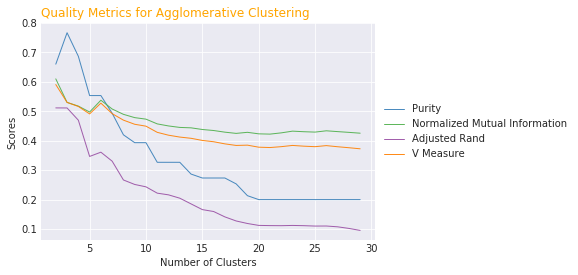

In [16]:
# Understanding the number of clusters and parameters change
overall = []
for n in range(2,30):
    agg_cluster = AgglomerativeClustering(n_clusters = n).fit(X)
    labels_agg = agg_cluster.labels_
    agg_metrics = quality_metrics(X, y, labels_agg)
    overall.append(agg_metrics)

maxes = quality_plots(np.arange(2,30), np.array(overall), "Number of Clusters", "Quality Metrics for Agglomerative Clustering")
print(maxes)

Time:  0.0036225318908691406


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


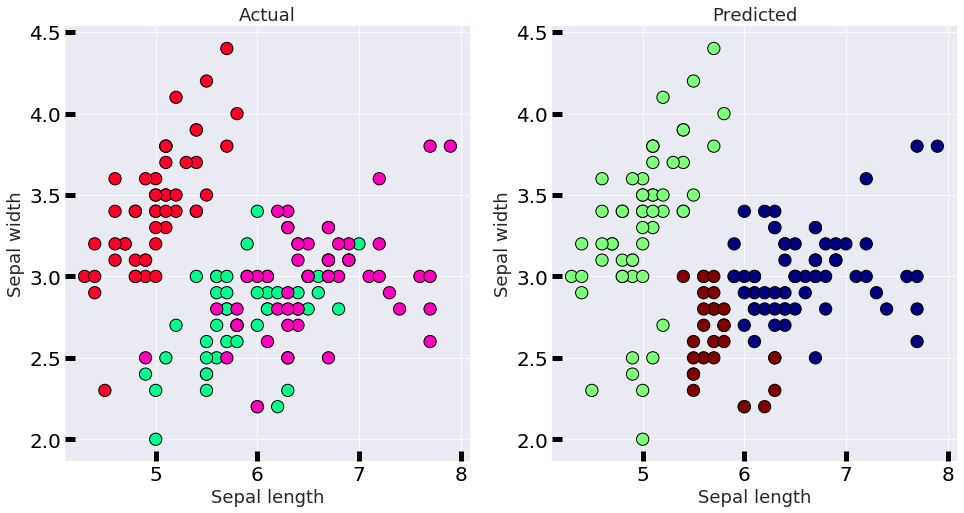

In [17]:
start = time.time()
agg_cluster = AgglomerativeClustering(n_clusters = maxes[0]).fit(X)
end = time.time()
print('Time: ', end - start)
labels_agg = agg_cluster.labels_
plot_clusters(labels_agg)
agg_metrics = quality_metrics(X, y, labels_agg)

In [18]:
# Get labels for each clustering
print(set(labels_kmeans))
print(set(labels_kmeans_random))
print(set(labels_dbscan))
print(set(labels_meanshift))
print(set(labels_agg))

{0, 1, 2}
{0, 1, 2}
{0, 1, -1}
{0, 1, 2}
{0, 1, 2}


In [19]:
centroid = []
centroid.append(np.mean(X[kmeans.labels_ == 0], axis = 0) )
centroid.append(np.mean(X[kmeans.labels_ == 1], axis = 0) )
centroid.append(np.mean(X[kmeans.labels_ == 2], axis = 0) )
models = [kmeans_random, dbscan, meanshift, agg_cluster]
for model in models:
    labels = model.labels_
    labels[labels == -1] = 2
    curr = []
    curr.append(np.mean(X[labels == 0], axis = 0))
    curr.append(np.mean(X[labels == 1], axis = 0))
    curr.append(np.mean(X[labels == 2], axis = 0))

    dist = [[0,0,0],[0,0,0],[0,0,0]]
    for i in range(3):
        for j in range(3):
            dist[i][j] = np.linalg.norm(centroid[i] - curr[j])
    
    a = [(1,2,3), (1,3,2), (2,1,3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]
    min_val = -1
    
    for elt in a:
        i,j,k = elt
        sums = dist[0][i-1] + dist[1][j-1] + dist[2][k-1]
        if(min_val == -1  or sums < min_val):
            min_val = sums
            golden = elt
            
    new_labels = np.zeros(labels.shape)
    new_labels[labels == (golden[0]-1)] = 0 
    new_labels[labels == (golden[1]-1)] = 1 
    new_labels[labels == (golden[2]-1)] = 2 
    model.labels_ = new_labels

Time:  0.0038061141967773438


/home/pmkokare/anaconda3/envs/cs6220/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


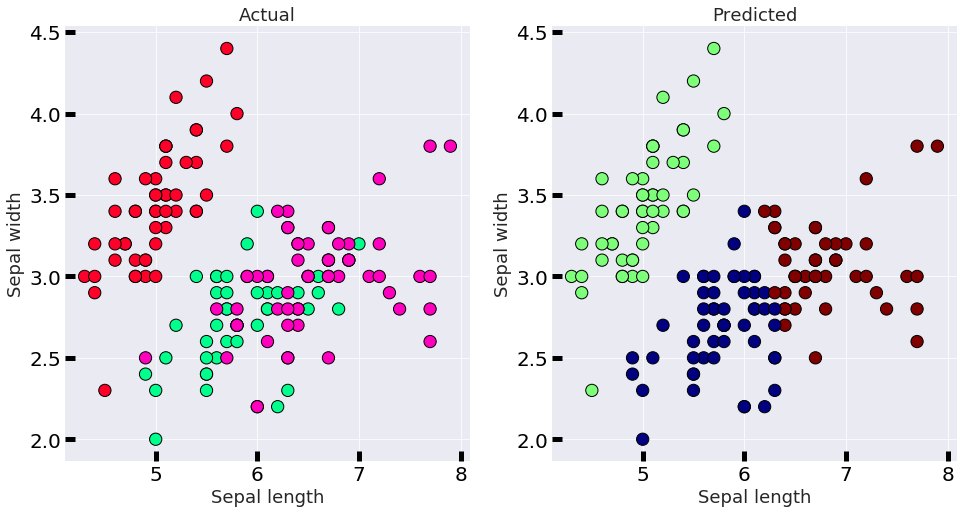

In [22]:
# Implement majority voting
start = time.time()
labels = np.zeros(kmeans.labels_.shape)
models = [kmeans, kmeans_random, dbscan, meanshift, agg_cluster]
for i in range(labels.shape[0]):
    votes = [0,0,0]
    for model in models:
        votes[int(model.labels_[i])] +=1
    
    votes = np.array(votes)
    labels[i] = np.argmax(votes)
    
end = time.time()
print('Time: ', end-start)
ensemble_metrics = quality_metrics(X, y, labels)
# print(kmeans.labels_ == labels)
plot_clusters(labels)

In [21]:
from prettytable import PrettyTable
print('Comparitive Results for Clustering Algorithms:')
t = PrettyTable(['Purity', 'Normalized Mutual Information', 'Adjusted Rand Score', 'V Measure Score'])
t.add_row(kmeans_metrics)
t.add_row(kmeans_random_metrics)
t.add_row(dbscan_metrics)
t.add_row(meanshift_metrics)
t.add_row(agg_metrics)
t.add_row(ensemble_metrics)
print(t)

Comparitive Results for Clustering Algorithms:
+--------------------+-------------------------------+---------------------+--------------------+
|       Purity       | Normalized Mutual Information | Adjusted Rand Score |  V Measure Score   |
+--------------------+-------------------------------+---------------------+--------------------+
|        0.82        |       0.646711490275439       |  0.6006861021484542 | 0.6467113936056552 |
|        0.82        |       0.646711490275439       |  0.6006861021484542 | 0.6467113936056552 |
|        0.68        |       0.7031201708357564      |  0.5517553852833211 | 0.6899788289414183 |
|        0.7         |       0.5448577294237529      | 0.48232421493774785 | 0.5425850870010085 |
| 0.7666666666666667 |       0.5301595935930913      |  0.5112126489117526 | 0.5300412040588491 |
|        0.82        |       0.646711490275439       |  0.6006861021484542 | 0.6467113936056552 |
+--------------------+-------------------------------+-----------------